## 作品五 單變量函數的根與最小值
#### 目標: 觀察每一張函數的圖形，並標出最小值的位置

 ## 1. 數值最小值計算
 #### $\displaystyle \min_x \sqrt{\frac{x^2+1}{x+1}}$
 說明: 當x=-1 時，此含數值不存在。又透過觀察函數可知，只有在x=-1時的右邊有值，故透過勘根定理找出最小值的點並標上。

C:\Users\3hhsi\AppData\Local\Temp\ipykernel_9380\2413866487.py:5: RuntimeWarning: invalid value encountered in sqrt
  f= lambda x : np.sqrt((x**2+1)/(x+1))


     fun: 0.9101797211244547
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 21
     nit: 17
 success: True
       x: 0.41421355017965744
The function has a local minimum at x = 0.4142
The corresponding function value is 0.9102


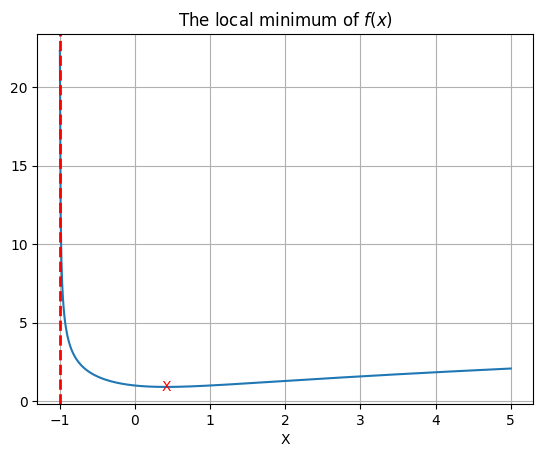

In [18]:
import numpy as np 
import scipy.optimize as opt
import matplotlib.pyplot as plt

f= lambda x : np.sqrt((x**2+1)/(x+1))
x = np.linspace(-5, 5, 1000)
plt.plot(x, f(x))
plt.xlabel('X'), plt.grid(True)
res = opt.minimize_scalar(f, bracket=[-0.5,0,2])
print(res)
print('The function has a local minimum at x = {:.4f}'.format(res.x))
print('The corresponding function value is {:.4f}'.format(res.fun))
plt.text(res.x, res.fun, 'X', color = 'r',
    horizontalalignment='center',
    verticalalignment='center')
plt.title('The local minimum of $f(x)$')
plt.axvline(x = -1, lw = 2, linestyle='--', c = 'r')
plt.show()

### 結論:
- 在此題中，不必設定範圍，也能找出最小值。
- 存在漸進線，當 = -1 時，此函數不存在。

## 2. 給定範圍求最小值 
#### $\displaystyle \min_{-4 \leq x \leq 3} (x+1)^5 sin(x-3)$
說明: 設定函數x值為-4~3 ，觀察函數圖形，標出最小值。

     fun: -256.5505378997517
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 15
     nit: 11
 success: True
       x: 2.402483756637825
The function has a local minimum at x = 2.4025
The corresponding function value is -256.5505


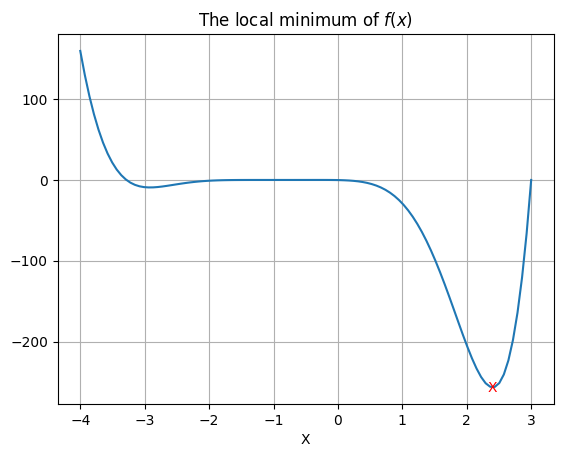

In [10]:
import numpy as np 
import scipy.optimize as opt
import matplotlib.pyplot as plt

f= lambda x : (x+1)**5*np.sin(x-3)
x = np.linspace(-4, 3, 100)
plt.plot(x, f(x))
plt.xlabel('X'), plt.grid(True)
res = opt.minimize_scalar(f, bracket=[1,2,3])
print(res)
print('The function has a local minimum at x = {:.4f}'.format(res.x))
print('The corresponding function value is {:.4f}'.format(res.fun))
plt.text(res.x, res.fun, 'X', color = 'r',
    horizontalalignment='center',
    verticalalignment='center')
plt.title('The local minimum of $f(x)$')
plt.show()


3. 計算 $L(x) = 10$ 的解 x, 其中
$L(x) = \int_a^x \sqrt{1 + (f'(t))^2}\; dt$, \;\; for $f(t) = t^2/2$ and $a = 0$.

The solution is at x = 4.1680


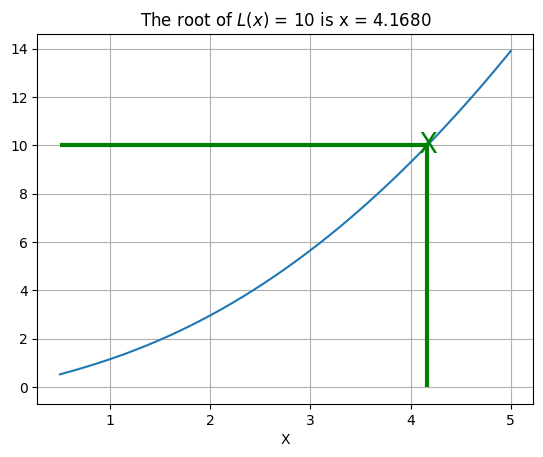

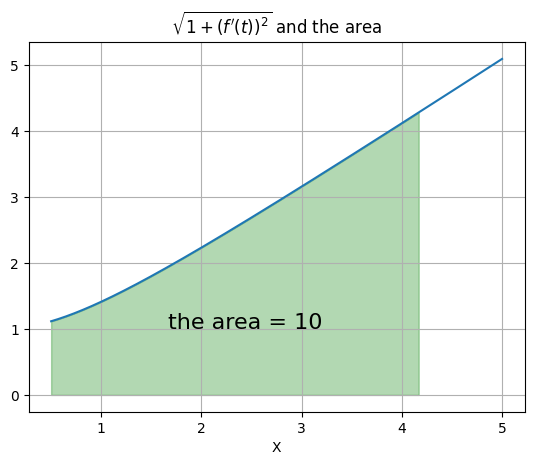

In [17]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import scipy.integrate as integral
import sympy as sym

# --------------------定義函數
t = sym.Symbol('t')
f = (t**2) / 2
fp = f.diff(t)
n = sym.lambdify(t, sym.sqrt(1 + (fp**2)))
def L(x, a):
    L = integral.quad(n, a, x)[0]
    return L
#--------------------畫函數圖
a = 0
x = np.linspace(0.5, 5, 1000)
vec_L = np.vectorize(L) 
L_value = vec_L(x, a)
plt.plot(x, L_value)
plt.xlabel('X'), plt.grid(True)
#--------------------找根
solve = 10
def La(x) :
 vec_L = np.vectorize(L)
 return vec_L(x, a) - 10
sol = opt.root_scalar(La, bracket=[4, 5], method='brentq')
print('The solution is at x = {:.4f}'.format(sol.root)) 
plt.text(sol.root, solve, 'X', color = 'g', fontsize = 20,
 horizontalalignment='center',
 verticalalignment='center')
plt.title('The root of $L(x)$ = 10 is x = {:.4f}'.format(sol.root))
plt.vlines(sol.root, 0, solve, lw = 3, color = 'g')
plt.hlines(10, x.min(), 4.1680, lw=3, color = 'g')
plt.show()
# ----------------------------------著色

plt.plot(x, n(x))
plt.xlabel('X'), plt.grid(True)
x_area = np.linspace(x.min(), sol.root, 100 )
y_area = n(x_area)
plt.fill_between(x_area, y_area, 0, color = 'green', alpha = 0.3)
plt.text(sol.root - 2.5, 1, 'the area = {}'.format(solve), fontsize = 16)
plt.title('$\sqrt{1 + (f\'(t))^2}$ and the area')
plt.show()


#### 討論：
- 因為 opt.root_scalar 只能求函數 = 0 的解，故為求 $L(x)$= 10 的
解必須先將函數減 10 平移。
- 右圖為 L(x) 中積分內部的函數，即 $\sqrt{1 + (f'(t))^2}$，則根據題意與
積分意義可解釋為函數下面積和為 10 的解。

## 4. 最大概似函數估計（MLE）：
計算 $\displaystyle \max_{\lambda} \ln \Pi_{i=1}^N f(x_i; \lambda)$ ,
其中 $f(x_i; \lambda)$ 代表指數分配（參數 $\lambda$）的概似函數，即 $f(x_i; \lambda) = \lambda e^{-\lambda x_i}$。 令樣本數 N= 10, 20 ,30, 50, 100, 300, 500， 分別生成樣本 $x_i$（令真實 $\lambda = 2$，或自己設定），並採最大概似估計法(log MLE)估計 $\lambda$。
- 請注意：本題雖然可以直接以紙筆推演出最後的封閉解（樣本平均值），不過為配合本章的主題，仍採計算對數概似函數最大值的方式進行。另外，也可以嘗試不取對數的做法，即 $\displaystyle \max_{\lambda}  \Pi_{i=1}^N f(x_i; \lambda)$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'STD')

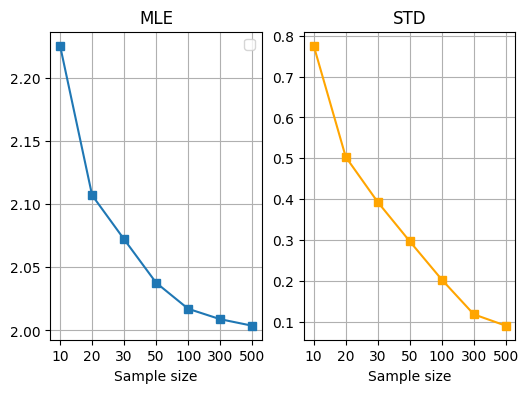

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon
import scipy.optimize as opt

n = [10, 20, 30, 50, 100, 300, 500]
N = 10000
lam = np.zeros(len(n))
lstd = np.zeros(len(n))
est = np.zeros(N)
for j in range(len(n)):
    n1 = n[j]
    X = expon.rvs(loc = 0, scale = 1 / 2, size = (N, n1))
    for i in range(N):
        x = X[i, :]   
        f = lambda l : - (n1*np.log(l) - l*np.sum(x))
        res = opt.minimize_scalar(f, bounds=[0, 100], method='bounded')
        est[i] = res.x
    lam[j] = est.mean()
    lstd[j] = est.std()
fig, ax = plt.subplots(1, 2, figsize = [6, 4])
plt.subplot(121)
plt.plot(lam, marker = 's')
plt.xticks(np.arange(len(n)), labels=n)
plt.xlabel('Sample size')
plt.grid(), plt.legend()
plt.title('MLE')
plt.subplot(122)
plt.plot(lstd, marker = 's', c = 'orange')
plt.xticks(np.arange(len(n)), labels=n)
plt.xlabel('Sample size')
plt.grid()
plt.title('STD')

